In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 98% 146M/149M [00:07<00:00, 23.7MB/s]
100% 149M/149M [00:07<00:00, 20.1MB/s]


In [3]:
from genericpath import isdir
def get_class_paths(path):
  classes = []
  class_paths = []

  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    if os.path.isdir(label_path):

      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)
        classes.append(label)
        class_paths.append(image_path)

  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
  })

  return df






In [4]:
tr_df = get_class_paths("/content/Training")

In [5]:
tr_df

,Class Path,Class
0,/content/Training/notumor/Tr-no_0794.jpg,notumor
1,/content/Training/notumor/Tr-no_1039.jpg,notumor
2,/content/Training/notumor/Tr-no_0972.jpg,notumor
3,/content/Training/notumor/Tr-no_0559.jpg,notumor
4,/content/Training/notumor/Tr-no_1252.jpg,notumor
...,...,...
5707,/content/Training/glioma/Tr-gl_0255.jpg,glioma
5708,/content/Training/glioma/Tr-gl_0182.jpg,glioma
5709,/content/Training/glioma/Tr-gl_0553.jpg,glioma
5710,/content/Training/glioma/Tr-gl_0380.jpg,glioma


In [6]:
ts_df = get_class_paths("/content/Testing")

In [7]:
ts_df

,Class Path,Class
0,/content/Testing/notumor/Te-no_0097.jpg,notumor
1,/content/Testing/notumor/Te-no_0301.jpg,notumor
2,/content/Testing/notumor/Te-noTr_0000.jpg,notumor
3,/content/Testing/notumor/Te-no_0222.jpg,notumor
4,/content/Testing/notumor/Te-no_0139.jpg,notumor
...,...,...
1306,/content/Testing/glioma/Te-gl_0280.jpg,glioma
1307,/content/Testing/glioma/Te-gl_0163.jpg,glioma
1308,/content/Testing/glioma/Te-gl_0194.jpg,glioma
1309,/content/Testing/glioma/Te-gl_0146.jpg,glioma


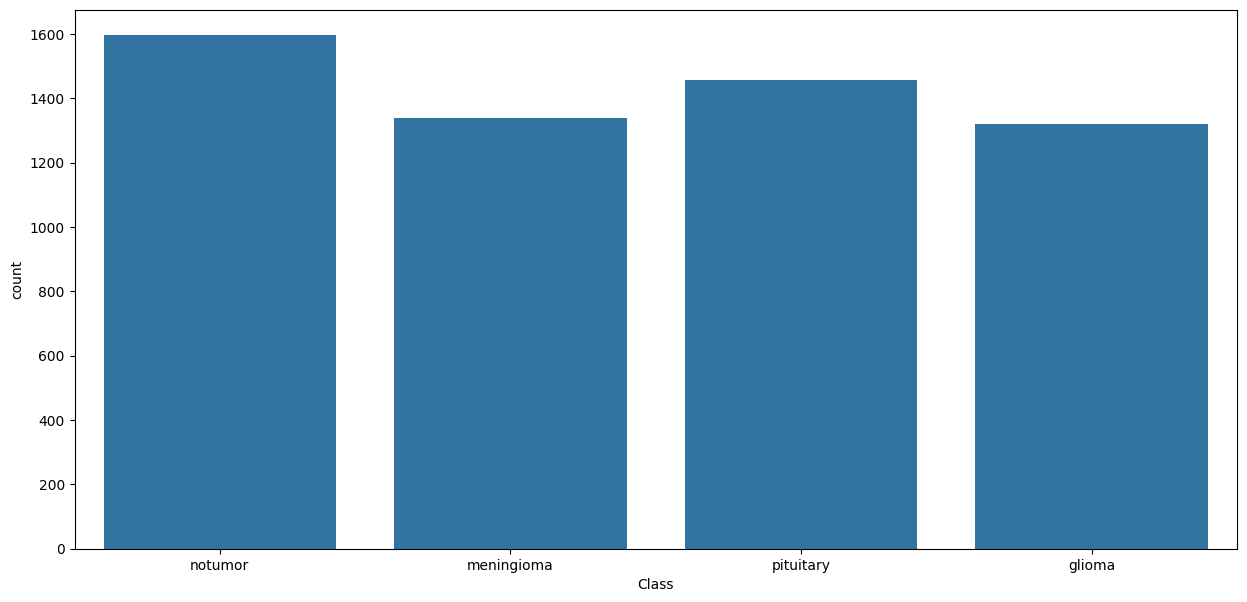

In [8]:
plt.figure(figsize = (15,7))
ax = sns.countplot(data = tr_df, x = tr_df['Class'])

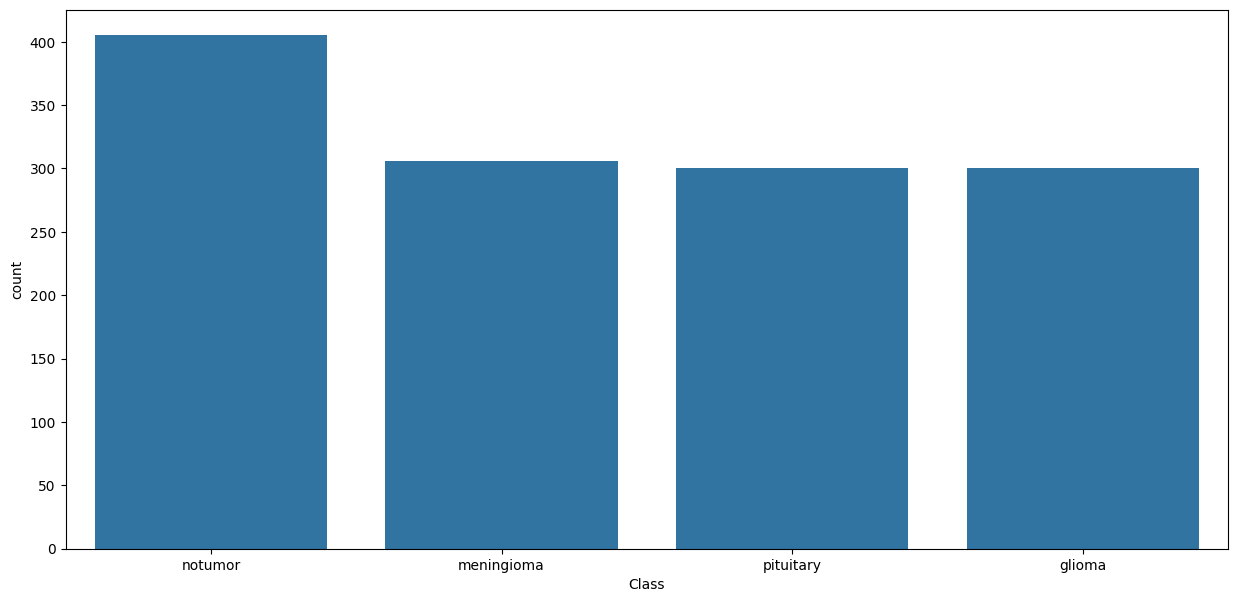

In [9]:
plt.figure(figsize = (15,7))
ax = sns.countplot(data = ts_df, x = ts_df['Class'])

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [11]:
valid_df, ts_df = train_test_split(ts_df, test_size = 0.5, stratify= ts_df['Class'])

In [12]:
valid_df

,Class Path,Class
391,/content/Testing/notumor/Te-no_0256.jpg,notumor
189,/content/Testing/notumor/Te-no_0352.jpg,notumor
858,/content/Testing/pituitary/Te-pi_0018.jpg,pituitary
973,/content/Testing/pituitary/Te-pi_0151.jpg,pituitary
1243,/content/Testing/glioma/Te-gl_0032.jpg,glioma
...,...,...
274,/content/Testing/notumor/Te-no_0292.jpg,notumor
584,/content/Testing/meningioma/Te-me_0183.jpg,meningioma
1102,/content/Testing/glioma/Te-gl_0142.jpg,glioma
1237,/content/Testing/glioma/Te-gl_0169.jpg,glioma


In [13]:
ts_df

,Class Path,Class
619,/content/Testing/meningioma/Te-me_0157.jpg,meningioma
335,/content/Testing/notumor/Te-no_0141.jpg,notumor
477,/content/Testing/meningioma/Te-me_0269.jpg,meningioma
364,/content/Testing/notumor/Te-no_0253.jpg,notumor
436,/content/Testing/meningioma/Te-me_0141.jpg,meningioma
...,...,...
892,/content/Testing/pituitary/Te-pi_0122.jpg,pituitary
657,/content/Testing/meningioma/Te-me_0091.jpg,meningioma
528,/content/Testing/meningioma/Te-me_0244.jpg,meningioma
373,/content/Testing/notumor/Te-no_0343.jpg,notumor


In [14]:
batch_size = 32

img_size = (299, 299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [15]:
tr_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col = 'Class Path',
    y_col = 'Class',
    batch_size = batch_size,
    target_size = img_size)

valid_gen = image_generator.flow_from_dataframe(
    valid_df,
    x_col = 'Class Path',
    y_col = 'Class',
    batch_size = batch_size,
    target_size = img_size)

ts_gen = ts_gen.flow_from_dataframe(
    ts_df,
    x_col = 'Class Path',
    y_col = 'Class',
    batch_size = 16,
    target_size = img_size, shuffle = False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


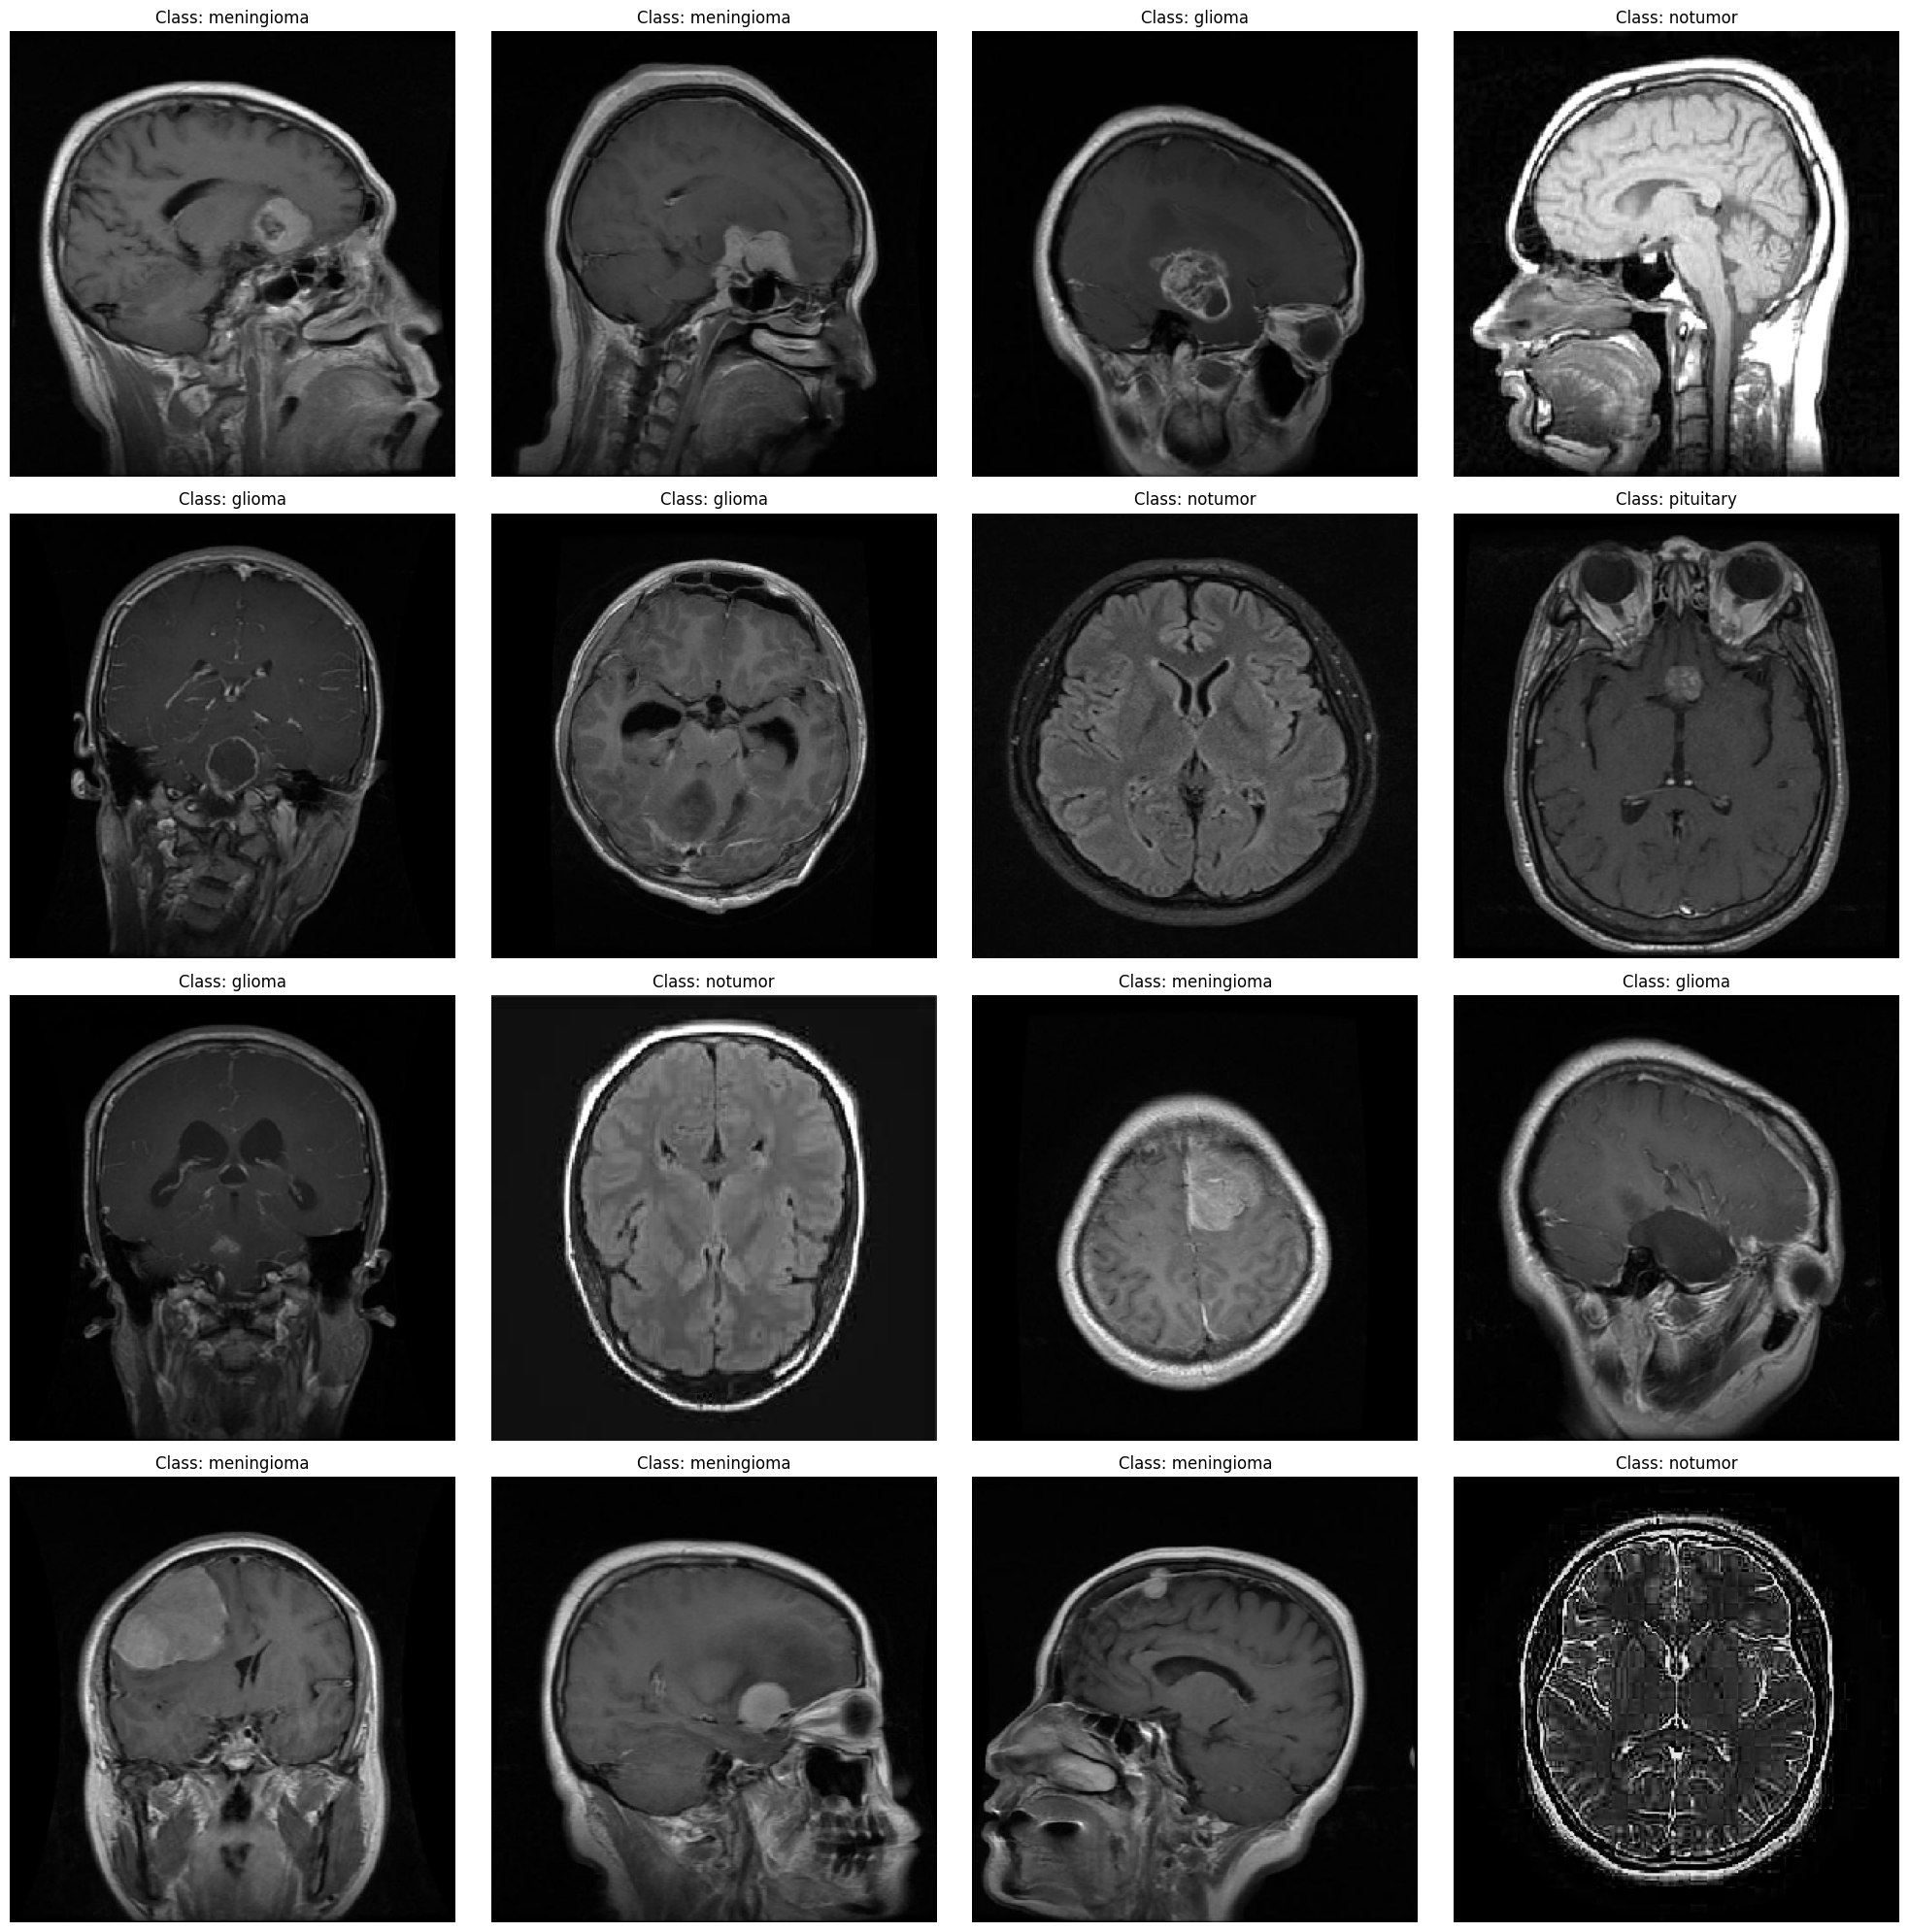

In [16]:
plt.figure(figsize = (20, 20))
for i in range(16):
  plt.subplot(4, 4, i+1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  class_index = np.argmax(label)

  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  index_position = class_indices.index(class_index)

  class_name = class_names[index_position]

  plt.title(f"Class: {class_name}")
  plt.axis('off')

plt.tight_layout()
plt.show()




In [17]:
img_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception(
    include_top = False,
    weights = 'imagenet',
    input_shape = img_shape,
    pooling = 'max')

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate = 0.3),
    Dense(128, activation = 'relu'),
    Dropout(rate = 0.25),
    Dense(4, activation = 'softmax')
])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [18]:
model.compile(Adamax(learning_rate = 0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy', Precision(), Recall()])

In [19]:
hist = model.fit(tr_gen, epochs=5, validation_data = valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.7734 - loss: 0.6820 - precision: 0.8284 - recall: 0.6485 - val_accuracy: 0.8931 - val_loss: 0.2622 - val_precision: 0.9012 - val_recall: 0.8916
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 159s 776ms/step - accuracy: 0.9822 - loss: 0.0546 - precision: 0.9844 - recall: 0.9808 - val_accuracy: 0.9344 - val_loss: 0.1671 - val_precision: 0.9371 - val_recall: 0.9328
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 142s 777ms/step - accuracy: 0.9917 - loss: 0.0236 - precision: 0.9925 - recall: 0.9912 - val_accuracy: 0.9664 - val_loss: 0.1127 - val_precision: 0.9664 - val_recall: 0.9664
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 140s 774ms/step - accuracy: 0.9944 - loss: 0.0198 - precision: 0.9945 - recall: 0.9938 - val_accuracy: 0.9863 - val_loss: 0.0334 - val_precision: 0.9862 - val_recall: 0.9847
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 140s 771ms/step - accuracy: 0.9980 - loss: 0.0076 - precision: 0.9980 - recall: 0.9980 - val_accuracy: 0.9878 - val_loss: 

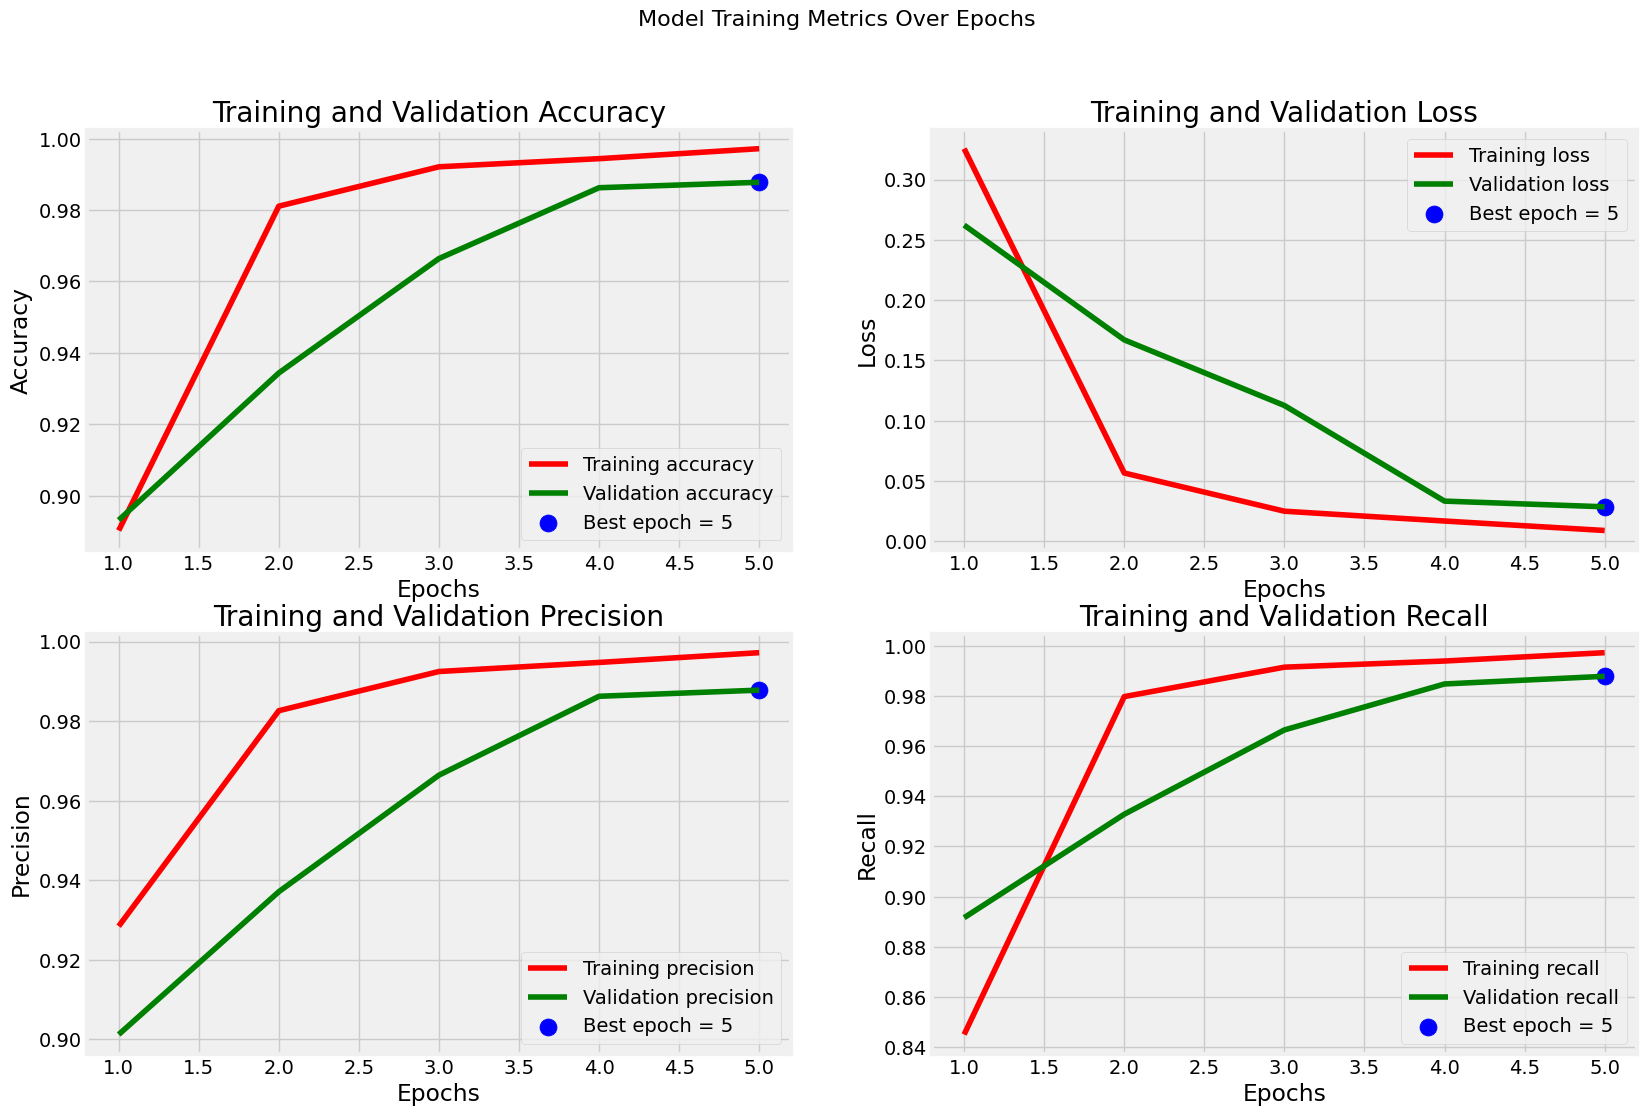

In [20]:
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])

  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]


plt.figure(figsize = (20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label = f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label = f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s = 150, c = 'blue', label = f'Best epoch = {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize = 16)
plt.show()


In [21]:
train_score = model.evaluate(tr_gen, verbose = 1)
valid_score = model.evaluate(valid_gen, verbose = 1)
test_score = model.evaluate(ts_gen, verbose = 1)

print(f"Train Accuracy: {train_score[1] * 100 :.2f}%")
print(f"Train Loss: {train_score[0] :.4}%")
print(f"\n\nValidation Accuracy: {valid_score[1] * 100 :.2f}%")
print(f"Validation Loss: {valid_score[0] :.4f}")
print(f"\n\nTest Accuracy: {test_score[1] * 100 :.2f}%")
print(f"Test Loss: {test_score[0] :.4f}")


179/179 ━━━━━━━━━━━━━━━━━━━━ 45s 247ms/step - accuracy: 0.9995 - loss: 0.0018 - precision: 0.9995 - recall: 0.9995
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - accuracy: 0.9941 - loss: 0.0179 - precision: 0.9945 - recall: 0.9941
 1/41 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - accuracy: 1.0000 - loss: 9.6317e-05 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.9944 - loss: 0.0185 - precision: 0.9944 - recall: 0.9944
Train Accuracy: 99.93%
Train Loss: 0.001976%


Validation Accuracy: 98.78%
Validation Loss: 0.0314


Test Accuracy: 98.93%
Test Loss: 0.0315


41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step


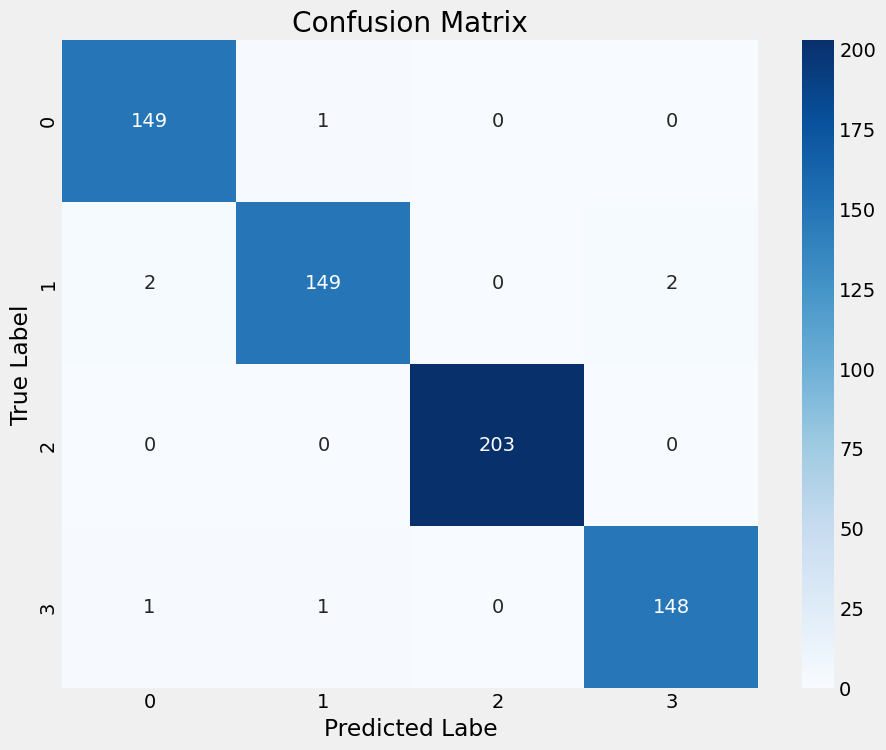

In [22]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis = 1)

class_dict = {
    0 : 'glioma_tumor',
    1 : 'meningioma_tumor',
    2 : 'no_tumor',
    3 : 'pituitary_tumor'
}

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd', xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted Labe')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [23]:
from PIL import Image

def predict(img_path: str) -> None:
  labels = list(class_dict.keys())

  plt.figure(figsize = (6, 8))

  img = Image.open(img_path)
  resized_img = img.resize((299, 299))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis =0 ) / 255.0

  predictions = model.predict(img_array)
  probabilities = list(predictions[0])

  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_idx]

  plt.subplot(2, 1, 1)
  plt.imshow(resized_img)
  plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

  plt.subplot(2, 1, 2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel("Probability", fontsize = 15)
  plt.title("Class Probabilities")

  ax = plt.gca()
  ax.bar_label(bars,fmt="%.2f")

  plt.tight_layout()
  plt.show()

  print(f"\nPredicted tumor type: {predicted_class}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


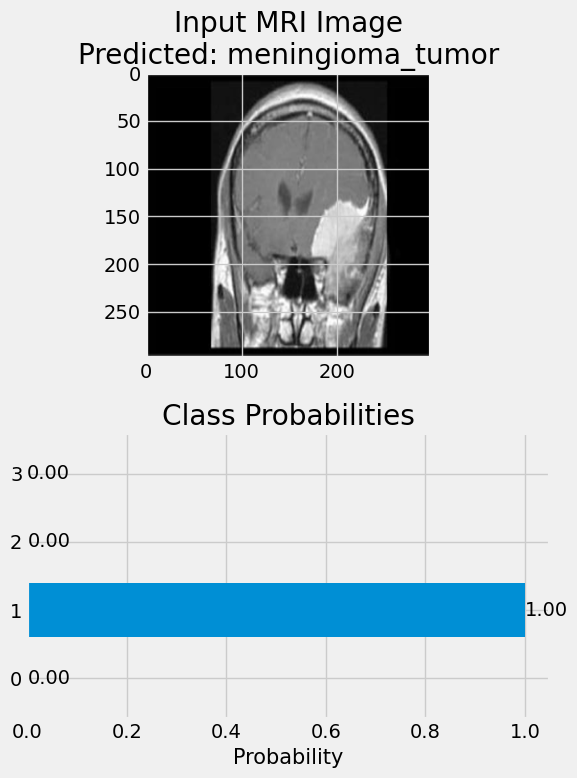


Predicted tumor type: meningioma_tumor


In [24]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


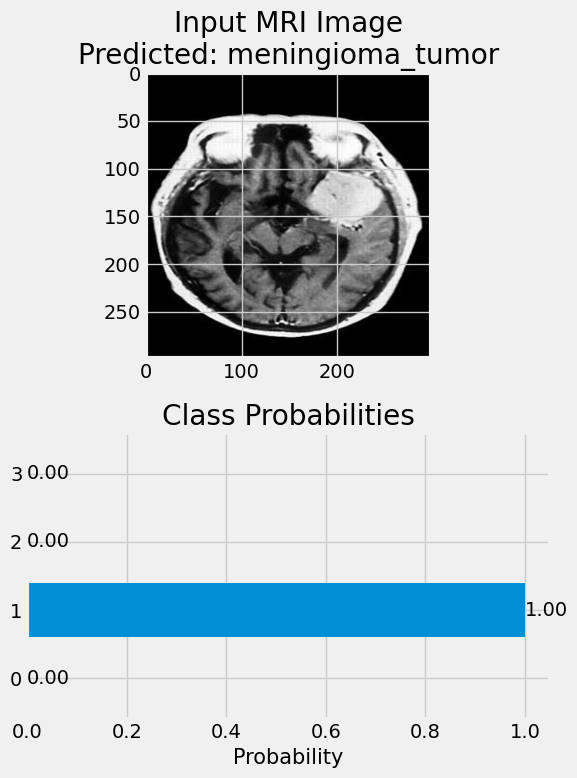


Predicted tumor type: meningioma_tumor


In [25]:
predict("/content/Testing/meningioma/Te-meTr_0005.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


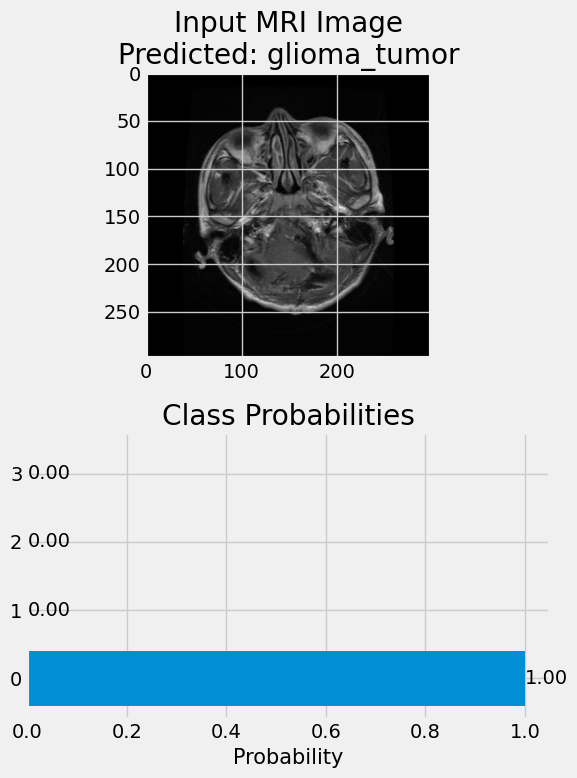


Predicted tumor type: glioma_tumor


In [26]:
predict("/content/Testing/glioma/Te-gl_0029.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


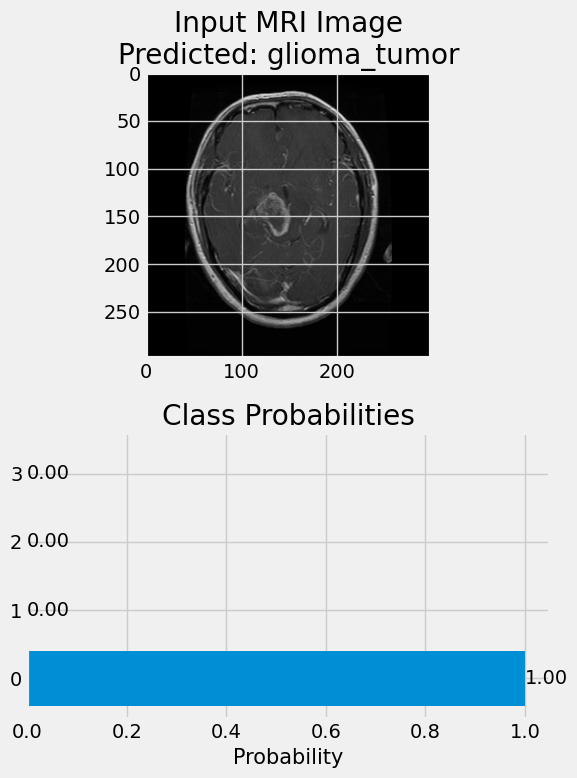


Predicted tumor type: glioma_tumor


In [27]:
predict("/content/Testing/glioma/Te-gl_0026.jpg")

In [28]:
model.save_weights("xception_model.weights.h5")

In [29]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [30]:
batch_size = 16

img_size = (224, 224)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)



tr_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col = 'Class Path',
    y_col = 'Class',
    batch_size = batch_size,
    target_size = img_size)

valid_gen = image_generator.flow_from_dataframe(
    valid_df,
    x_col = 'Class Path',
    y_col = 'Class',
    batch_size = batch_size,
    target_size = img_size)

ts_gen = ts_gen.flow_from_dataframe(
    ts_df,
    x_col = 'Class Path',
    y_col = 'Class',
    batch_size = 16,
    target_size = img_size, shuffle = False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [31]:
cnn_model = Sequential()

cnn_model.add(Conv2D(512, (3, 3), padding = 'same', input_shape = (224, 224, 3), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(256, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation = 'softmax'))

cnn_model.compile(Adamax(learning_rate = 0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy', Precision(), Recall()])


cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = cnn_model.fit(tr_gen, epochs=10, validation_data = valid_gen)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 146s 337ms/step - accuracy: 0.5506 - loss: 1.3119 - precision_1: 0.6968 - recall_1: 0.3589 - val_accuracy: 0.6611 - val_loss: 0.9323 - val_precision_1: 0.7093 - val_recall_1: 0.5847
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 160s 286ms/step - accuracy: 0.7853 - loss: 0.7010 - precision_1: 0.8177 - recall_1: 0.7523 - val_accuracy: 0.7618 - val_loss: 0.6998 - val_precision_1: 0.7942 - val_recall_1: 0.7130
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 103s 286ms/step - accuracy: 0.8523 - loss: 0.5261 - precision_1: 0.8651 - recall_1: 0.8275 - val_accuracy: 0.8458 - val_loss: 0.5004 - val_precision_1: 0.8610 - val_recall_1: 0.8321
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 144s 293ms/step - accuracy: 0.8819 - loss: 0.4225 - precision_1: 0.8902 - recall_1: 0.8728 - val_accuracy: 0.8427 - val_loss: 0.4578 - val_precision_1: 0.8544 - val_recall_1: 0.8244
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 139s 286ms/step - accuracy: 0.9098 - loss: 0.3462 - precision_1: 0.9161 - recall_1:

In [33]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'precision_1', 'recall_1', 'val_accuracy', 'val_loss', 'val_precision_1', 'val_recall_1'])


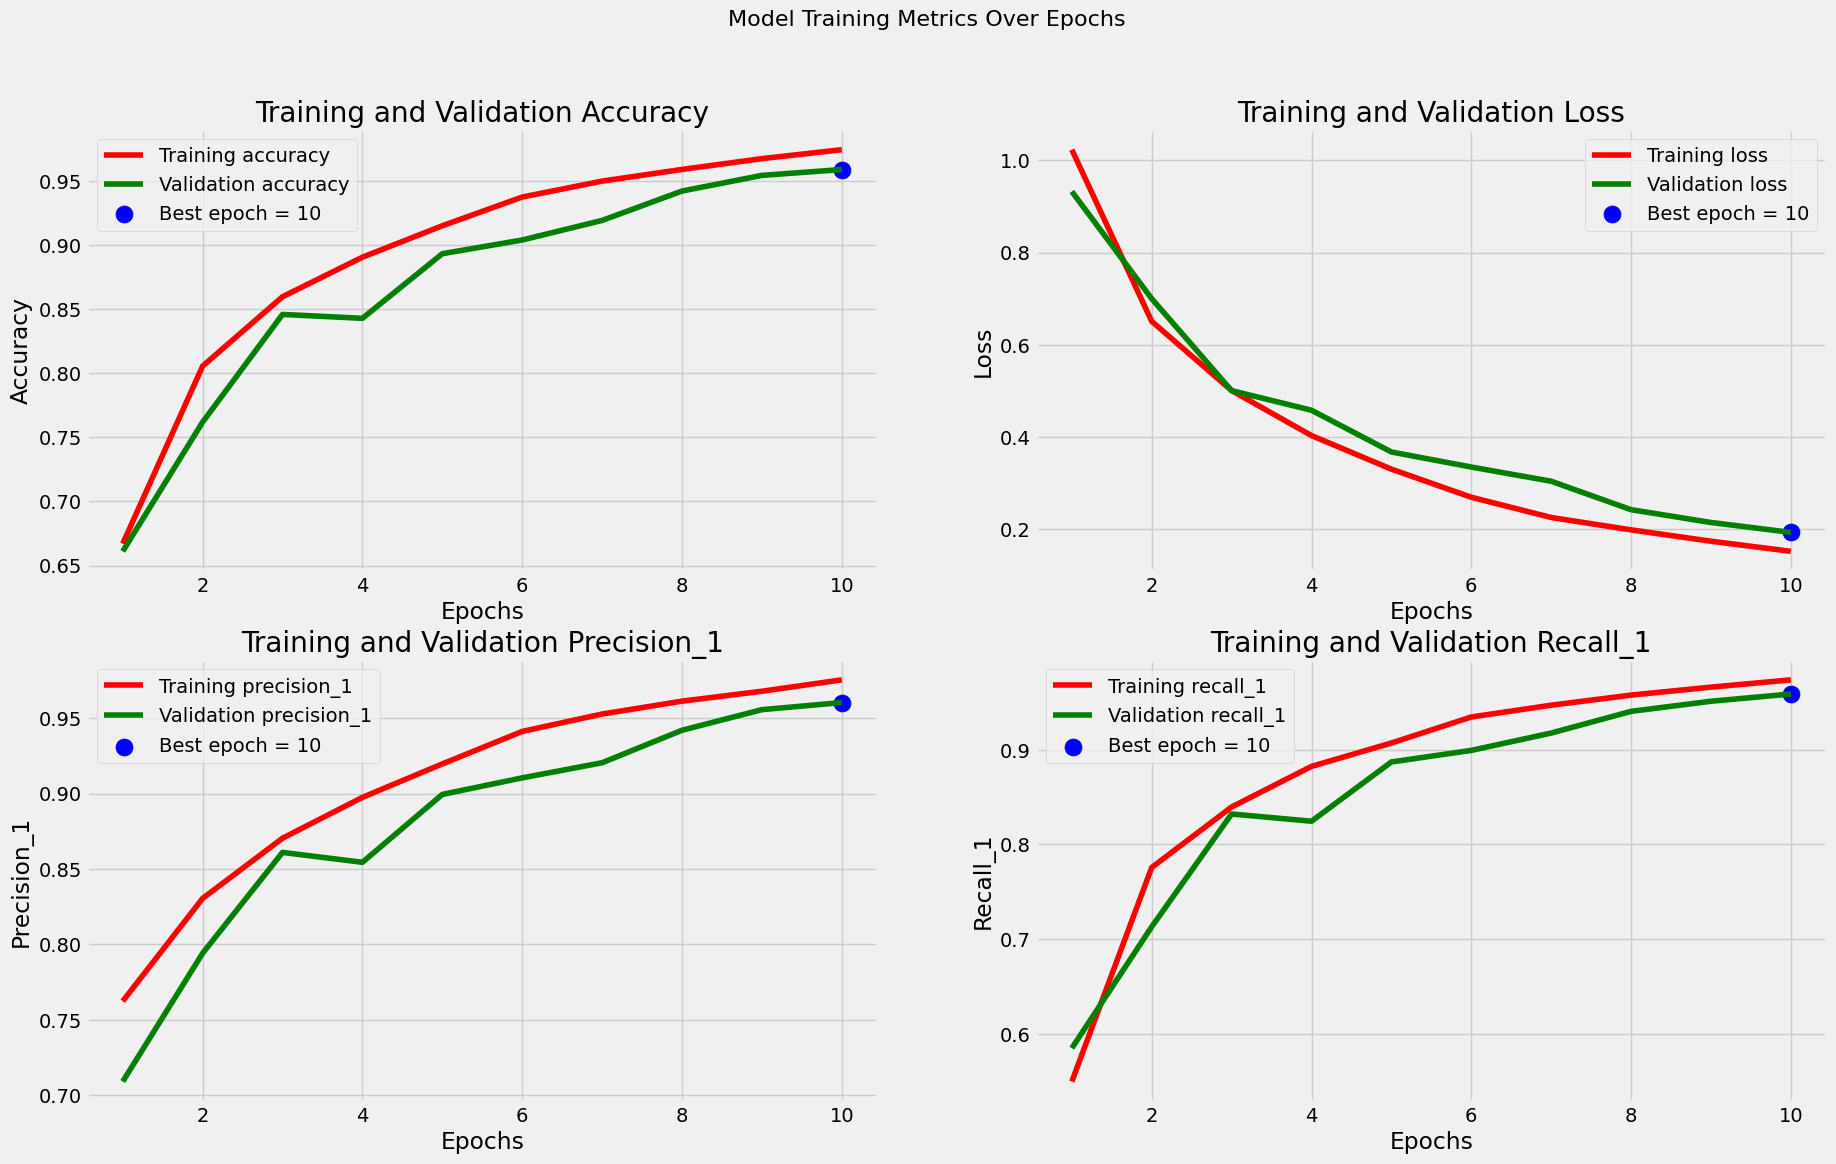

In [34]:
metrics = ['accuracy', 'loss', 'precision_1', 'recall_1']
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics}

best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])

  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]


plt.figure(figsize = (20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label = f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label = f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s = 150, c = 'blue', label = f'Best epoch = {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize = 16)
plt.show()


In [35]:
train_score = cnn_model.evaluate(tr_gen, verbose = 1)
valid_score = cnn_model.evaluate(valid_gen, verbose = 1)
test_score = cnn_model.evaluate(ts_gen, verbose = 1)

print(f"Train Accuracy: {train_score[1] * 100 :.2f}%")
print(f"Train Loss: {train_score[0] :.4}%")
print(f"\n\nValidation Accuracy: {valid_score[1] * 100 :.2f}%")
print(f"Validation Loss: {valid_score[0] :.4f}")
print(f"\n\nTest Accuracy: {test_score[1] * 100 :.2f}%")
print(f"Test Loss: {test_score[0] :.4f}")


357/357 ━━━━━━━━━━━━━━━━━━━━ 27s 75ms/step - accuracy: 0.9937 - loss: 0.1023 - precision_1: 0.9937 - recall_1: 0.9937
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.9646 - loss: 0.1817 - precision_1: 0.9648 - recall_1: 0.9642
 2/41 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.8906 - loss: 0.4592 - precision_1: 0.8906 - recall_1: 0.8906 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.9601 - loss: 0.2511 - precision_1: 0.9601 - recall_1: 0.9601
Train Accuracy: 99.26%
Train Loss: 0.1035%


Validation Accuracy: 95.73%
Validation Loss: 0.1951


Test Accuracy: 96.65%
Test Loss: 0.2037


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step


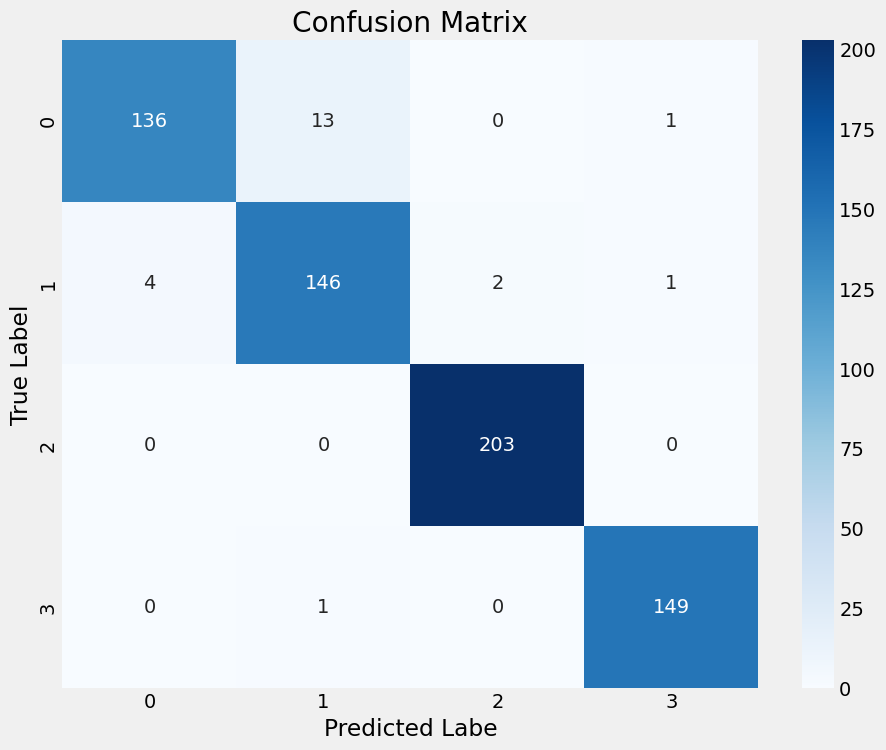

In [36]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis = 1)

class_dict = {
    0 : 'glioma_tumor',
    1 : 'meningioma_tumor',
    2 : 'no_tumor',
    3 : 'pituitary_tumor'
}

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd', xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted Labe')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [37]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       150
           1       0.91      0.95      0.93       153
           2       0.99      1.00      1.00       203
           3       0.99      0.99      0.99       150

    accuracy                           0.97       656
   macro avg       0.97      0.96      0.96       656
weighted avg       0.97      0.97      0.97       656



In [38]:
cnn_model.save("cnn_model.h5")

Streamlit APP

In [39]:
!pip install streamlit pyngrok python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 106.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.9 MB/s eta 0:00:00


In [40]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata


In [41]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')

ngrok.set_auth_token(ngrok_token)

In [42]:
def run_streamlit():
  os.system("streamlit run /content/app.py --server.port 8501")


In [105]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
from google.colab import userdata
from PIL import Image
from dotenv import load_dotenv
import os

load_dotenv()

output_dir = "saliency_maps"
os.makedirs(output_dir, exist_ok=True)

def generate_saliency_map(model, img_array, class_index, img_size, output_dir, file_name):
    with tf.GradientTape() as tape:
        img_tensor = tf.convert_to_tensor(img_array)
        tape.watch(img_tensor)

        predictions = model(img_tensor)
        target_class = predictions[:, class_index]

    gradients = tape.gradient(target_class, img_tensor)
    gradients = tf.math.abs(gradients)
    gradients = tf.reduce_max(gradients, axis=-1)
    gradients = gradients.numpy().squeeze()

    # Resize gradients to match original image size
    gradients = cv2.resize(gradients, img_size)

    # Create a circular mask for the brain area
    center = (gradients.shape[0] // 2, gradients.shape[1] // 2)
    radius = min(center[0], center[1]) - 10
    y, x = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
    mask = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= radius**2

    # Apply mask to gradients
    gradients = gradients * mask

    # Normalize only the brain area
    brain_gradients = gradients[mask]
    if brain_gradients.max() > brain_gradients.min():
        brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
        gradients[mask] = brain_gradients

    # Apply a higher threshold
    threshold = np.percentile(gradients[mask], 80)
    gradients[gradients < threshold] = 0

    # Apply more aggressive smoothing
    gradients = cv2.GaussianBlur(gradients, (11, 11), 0)

    # Create a heatmap overlay with enhanced contrast
    heatmap = cv2.applyColorMap(np.uint8(255 * gradients), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    # Resize heatmap to match original image size
    heatmap = cv2.resize(heatmap, img_size)

    # Superimpose the heatmap on original image with increased opacity
    original_img = img_array[0] * 255.0  # Convert back to original pixel range
    superimposed_img = heatmap * 0.7 + original_img * 0.3
    superimposed_img = superimposed_img.astype(np.uint8)

    # Save the saliency map image
    saliency_map_path = os.path.join(output_dir, file_name)
    cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

    return superimposed_img


def generate_explanation(img_path, model_prediction, confidence):
    prompt = f"""
    You are an expert neurologist. You are tasked with explaining a saliency map of a brain tumor MRI scan.
    The saliency map was generated by a deep learning model that was trained to classify brain tumors
    as either glioma, meningioma, pituitary, or no tumor.

    The saliency map highlights the regions of the image that the machine learning model is focusing on to make the prediction.

    The deep learning model predicted the image to be of class '{model_prediction}' with a confidence of {confidence * 100}%.

    In your response:
    - Explain what regions of the brain the model is focusing on, based on the saliency map. Refer to the regions highlighted in light cyan, those are the regions where the model is focusing on.
    - Explain possible reasons why the model made the prediction it did.
    - Don't mention anything like 'The saliency map highlights the regions the model is focusing on, which are in light cyan' in your explanation.
    - Keep your explanation to 4 sentences max.
    """

    img = Image.open(img_path)

    model = genai.GenerativeModel(model_name="gemini-1.5-flash")
    response = model.generate_content([prompt, img])

    return response.text


def load_xception_model(model_path):
    img_shape = (299, 299, 3)  # Define img_shape correctly
    base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet",
                                                input_shape=img_shape, pooling='max')

    model = Sequential([
        base_model,
        Flatten(),
        Dropout(rate=0.3),
        Dense(128, activation='relu'),
        Dropout(rate=0.25),
        Dense(4, activation='softmax')
    ])

    model.build((None,) + img_shape)

    model.compile(Adamax(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy', Precision(), Recall()])

    model.load_weights(model_path)

    return model

st.title("Brain Tumor Classification")
st.write("Upload an image of a brain MRI scan to classify")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    selected_model = st.radio(
        "Select Model",
        ("Transfer Learning - Xception", "Custom CNN")
    )

    if selected_model == "Transfer Learning - Xception":
        model = load_xception_model('/content/xception_model.weights.h5')
        img_size = (299, 299)
    else:
        model = load_model('/content/cnn_model.h5')
        img_size = (224, 224)

    labels = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']

    # Load the image from the uploaded file
    img = image.load_img(uploaded_file, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    class_index = np.argmax(prediction[0])
    result = labels[class_index]

    st.write(f"Predicted Class: {result}")
    st.write("Predictions:")
    for label, prob in zip(labels, prediction[0]):
        st.write(f"{label}: {prob:.4f}")

    # Generate the saliency map
    output_file_name = uploaded_file.name
    saliency_map = generate_saliency_map(model, img_array, class_index, img_size, output_dir, output_file_name)

    # Display the images side by side
    col1, col2 = st.columns(2)
    with col1:
        st.image(img, caption='Uploaded Image', use_container_width=True)
    with col2:
        st.image(saliency_map, caption='Saliency Map', use_container_width=True)

    # Prepare data for Plotly chart
    probabilities = prediction[0]
    sorted_indices = np.argsort(probabilities)[::-1]
    sorted_labels = [labels[i] for i in sorted_indices]
    sorted_probabilities = probabilities[sorted_indices]

    # Create a Plotly bar chart
    fig = go.Figure(go.Bar(
        x=sorted_probabilities,
        y=sorted_labels,
        orientation='h',
        marker_color=['red' if label == result else 'blue' for label in sorted_labels]
    ))

    # Customize the chart layout
    fig.update_layout(
        title="Probabilities for each Class",
        xaxis_title="Probability",
        yaxis_title="Class",
        height=400,
        width=600,
        yaxis=dict(autorange="reversed")
    )

    # Add value labels to the bars
    for i, prob in enumerate(sorted_probabilities):
        fig.add_annotation(
            x=prob,
            y=i,
            text=f"{prob:.4f}",
            showarrow=False,
            xanchor="left",
            xshift=5
        )

    # Display the Plotly chart
    st.plotly_chart(fig)

    saliency_map_path = os.path.join(output_dir, output_file_name)
    explanation = generate_explanation(saliency_map_path, result, prediction[0][class_index])

    st.write("## Explanation")
    st.write(explanation)


Writing app.py


In [106]:
!pkill ngrok


In [107]:
thread = Thread(target = run_streamlit)
thread.start()

In [108]:
public_url = ngrok.connect(addr = '8501', proto="http", bind_tls=True)
print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://674d-34-124-163-145.ngrok-free.app" -> "http://localhost:8501"
